In [1]:
# EDA & Data Visualization for MS Prognosis Forecasting

#Bu notebook, MS hastalarına ait demografik ve MRI özelliklerini inceleyerek prognoz riskini etkileyebilecek faktörleri keşfetmek için hazırlanmıştır.

#Bu çalışma yalnızca eğitim ve araştırma amaçlıdır.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [3]:

df = pd.read_csv('/Users/gulercihangiroglu/Desktop/ms /ms.csv')
df.head()


,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [4]:
df.shape
df.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Schooling', 'Breastfeeding',
       'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic',
       'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP',
       'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI',
       'Spinal_Cord_MRI', 'Initial_EDSS', 'Final_EDSS', 'group'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [6]:
df.describe().T
#target = 1 daha MS değil, =2 MS
#EDSS = expanded disability status scale: initial edss= başlangıç ağırlaşma, finaledss= takip sonrası
#edss count = 125, oysa elimizde 273 veri var. missing value var. temizlenecek. 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,273.0,136.000000,78.952517,0.0,68.0,136.0,204.0,272.0
Gender,273.0,1.615385,0.487398,1.0,1.0,2.0,2.0,2.0
Age,273.0,34.062271,11.114369,15.0,25.0,33.0,40.0,77.0
Schooling,272.0,15.176471,4.244175,0.0,12.0,15.0,20.0,25.0
Breastfeeding,273.0,1.831502,0.874998,1.0,1.0,2.0,3.0,3.0
Varicella,273.0,1.710623,0.732991,1.0,1.0,2.0,2.0,3.0
Initial_Symptom,272.0,6.430147,4.222009,1.0,3.0,6.0,9.0,15.0
Mono_or_Polysymptomatic,273.0,1.725275,0.494066,1.0,1.0,2.0,2.0,3.0
Oligoclonal_Bands,273.0,0.358974,0.558426,0.0,0.0,0.0,1.0,2.0
LLSSEP,273.0,0.424908,0.495237,0.0,0.0,0.0,1.0,1.0


In [7]:
numeric_cols = ["Age", "Schooling", "Initial_Symptom", "Oligoclonal_Bands", "LLSSEP", "ULSSEP", "VEP", "BAEP","Periventricular_MRI", "Cortical_MRI","Infratentorial_MRI", "Spinal_Cord_MRI"]

categorical_cols = ["Gender", "Breastfeeding", "Varicella", "Mono_or_Polysymptomatic"]


In [8]:
# group: target (0/1)
df["target"] = df["group"].map({1: 0, 2: 1})
df = df.drop(columns=["group"])

df[["target"]].head()
df["target"].value_counts()


target
1    148
0    125
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [10]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,273.0,136.000000,78.952517,0.0,68.0,136.0,204.0,272.0
Gender,273.0,1.615385,0.487398,1.0,1.0,2.0,2.0,2.0
Age,273.0,34.062271,11.114369,15.0,25.0,33.0,40.0,77.0
Schooling,272.0,15.176471,4.244175,0.0,12.0,15.0,20.0,25.0
Breastfeeding,273.0,1.831502,0.874998,1.0,1.0,2.0,3.0,3.0
Varicella,273.0,1.710623,0.732991,1.0,1.0,2.0,2.0,3.0
Initial_Symptom,272.0,6.430147,4.222009,1.0,3.0,6.0,9.0,15.0
Mono_or_Polysymptomatic,273.0,1.725275,0.494066,1.0,1.0,2.0,2.0,3.0
Oligoclonal_Bands,273.0,0.358974,0.558426,0.0,0.0,0.0,1.0,2.0
LLSSEP,273.0,0.424908,0.495237,0.0,0.0,0.0,1.0,1.0


In [12]:
missing_counts = df.isnull().sum().sort_values
missing_counts


<bound method Series.sort_values of Unnamed: 0                   0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
target                       0
dtype: int64>

In [15]:
optional_cols = ["Initial_EDSS", "Final_EDSS"]


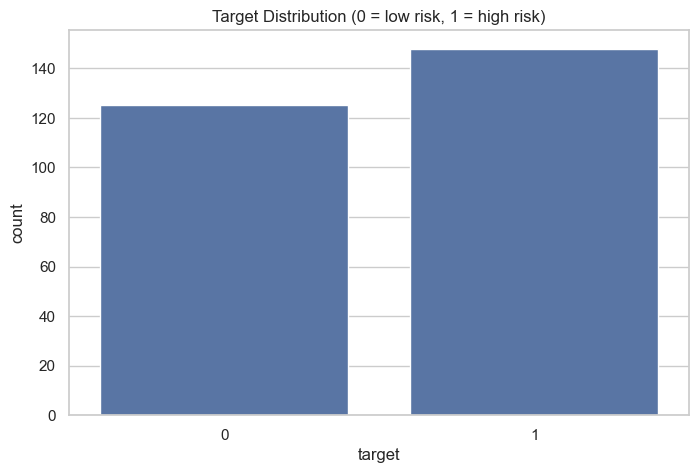

In [16]:
sns.countplot(x="target", data=df)
plt.title("Target Distribution (0 = low risk, 1 = high risk)")
plt.show()


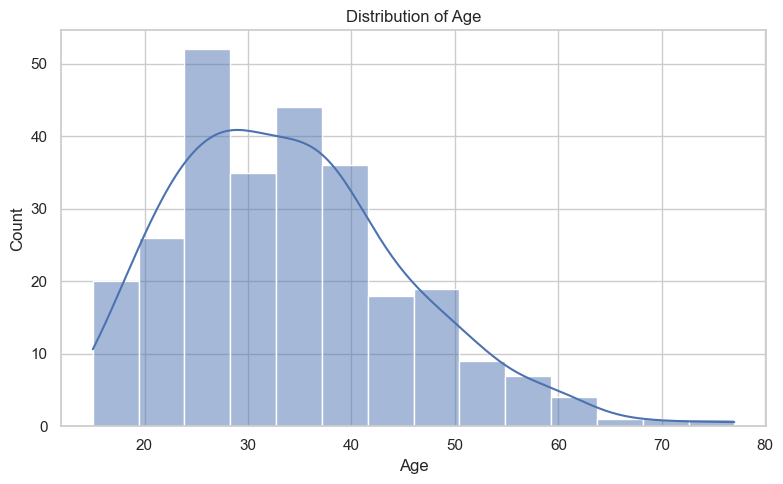

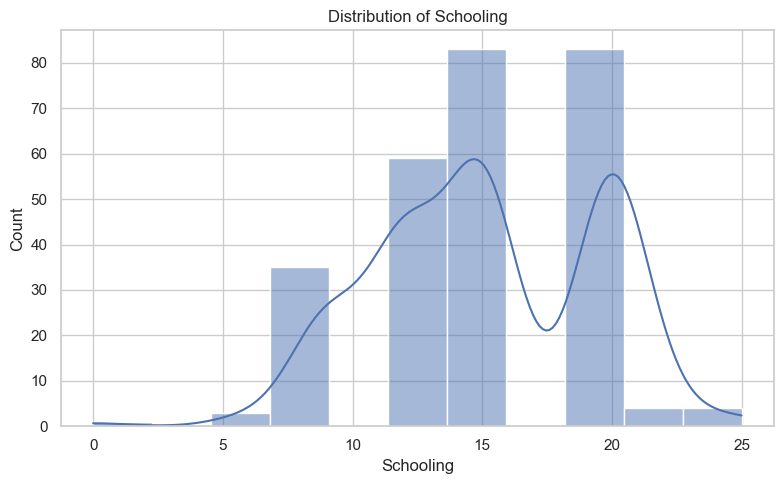

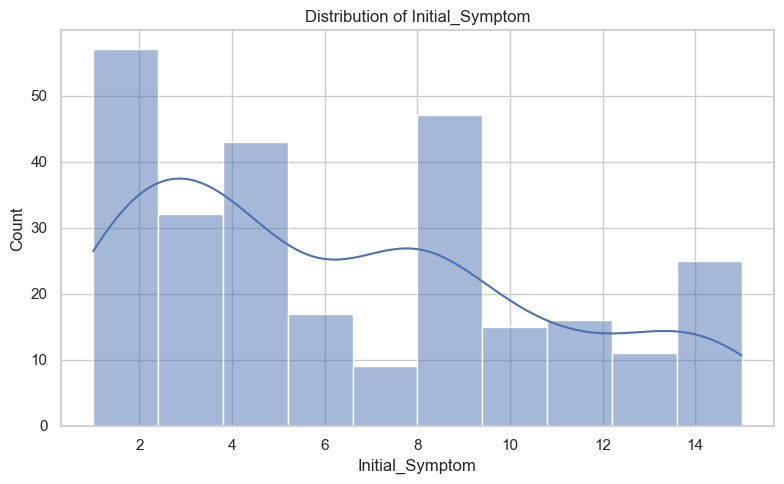

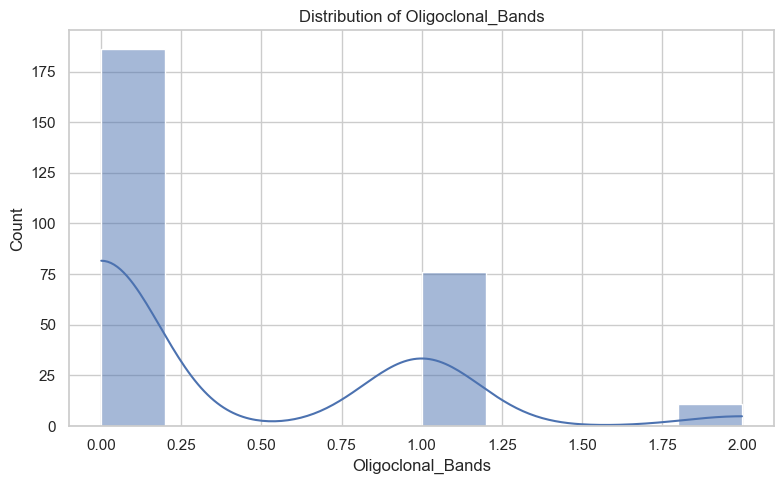

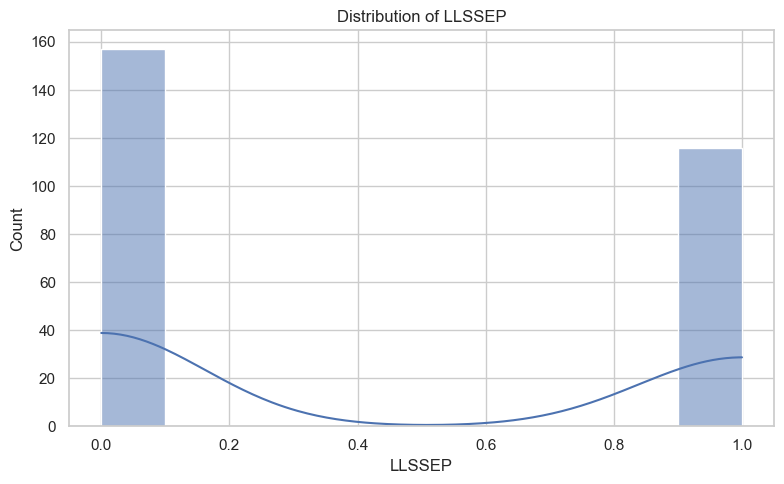

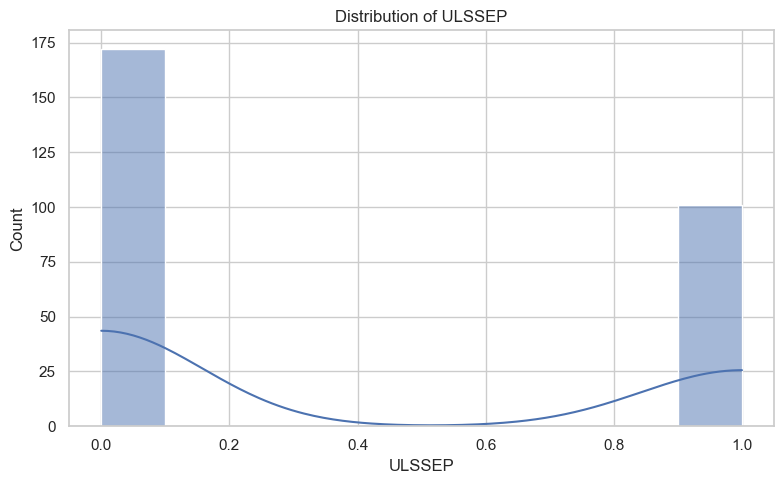

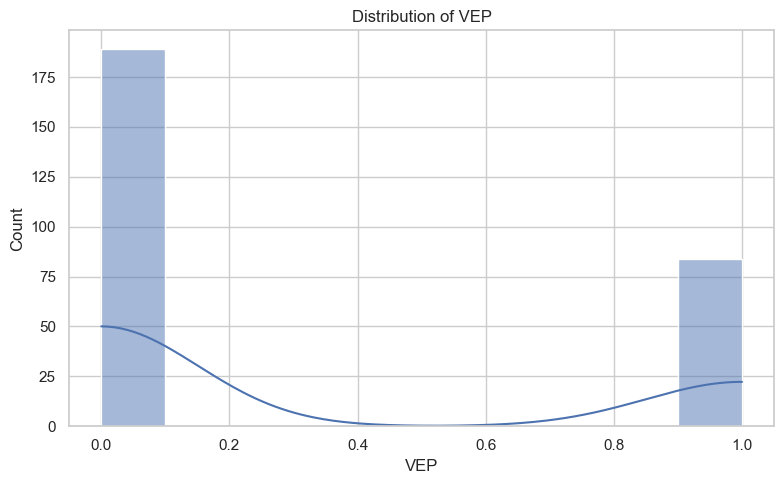

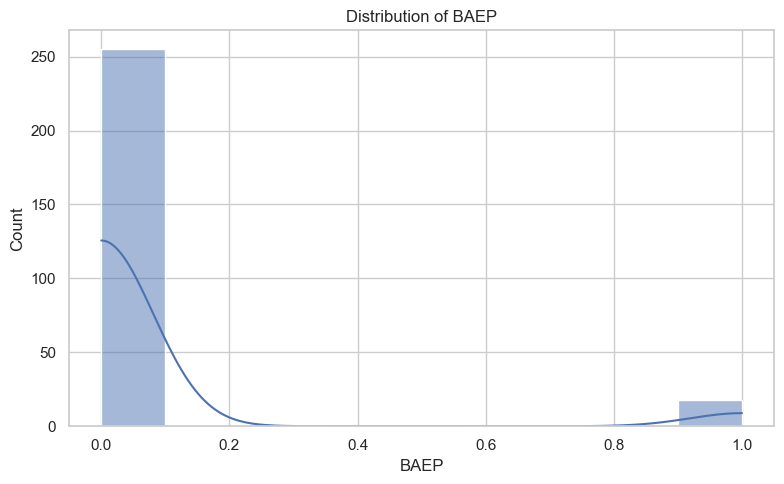

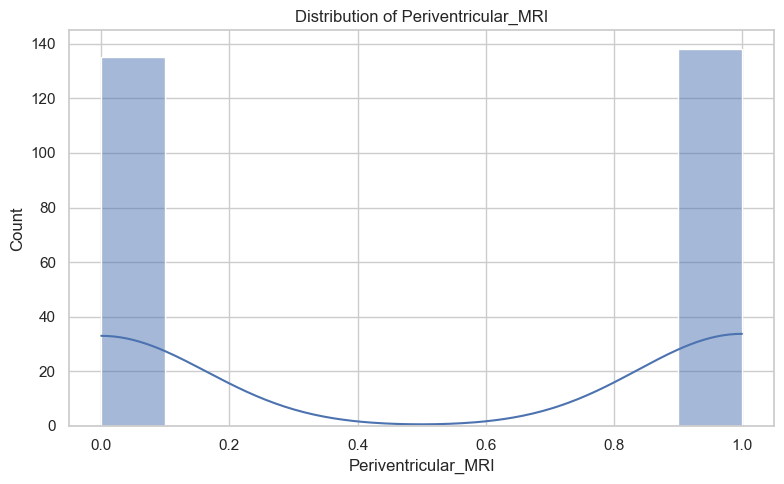

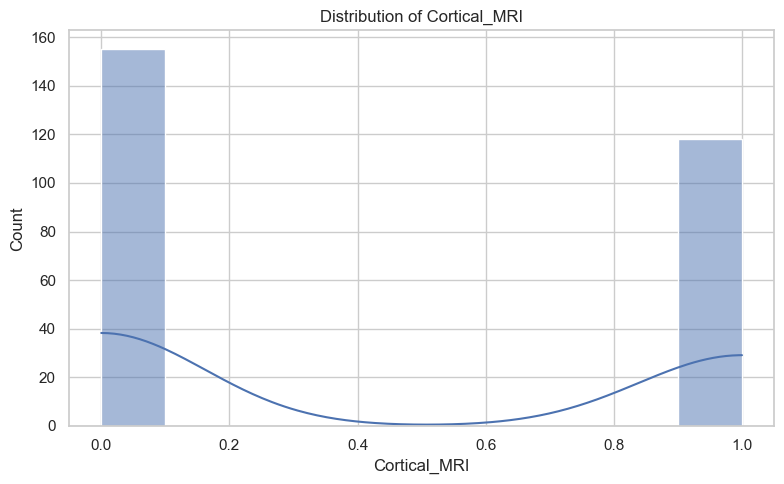

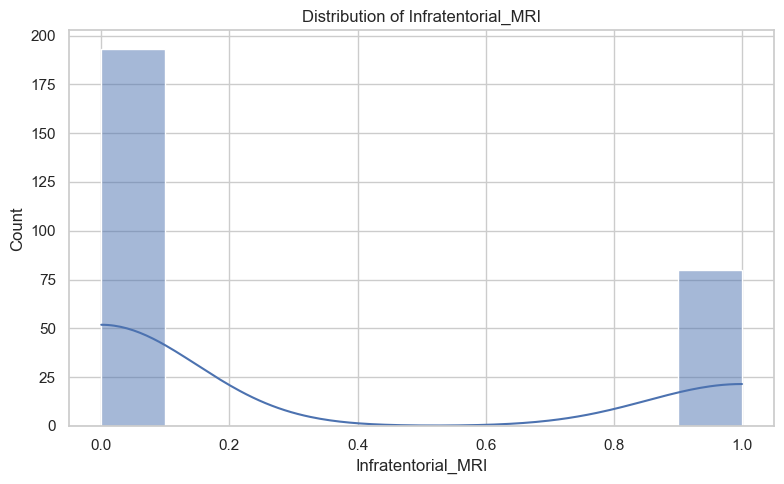

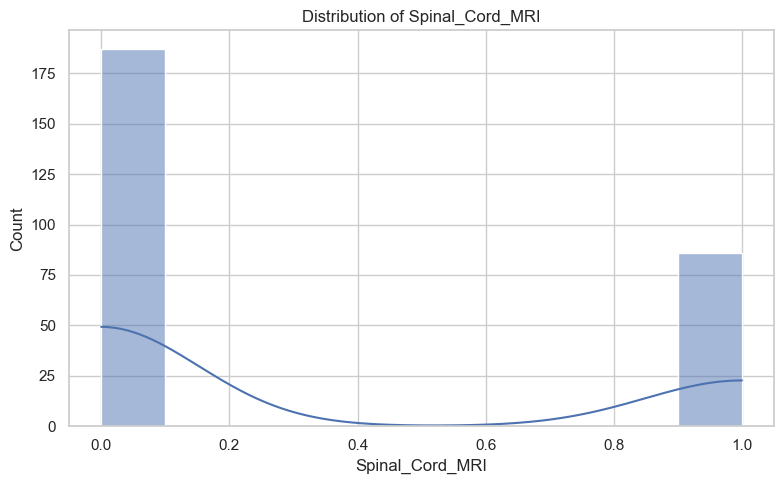

In [19]:
for col in numeric_cols:
    plt.figure()
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


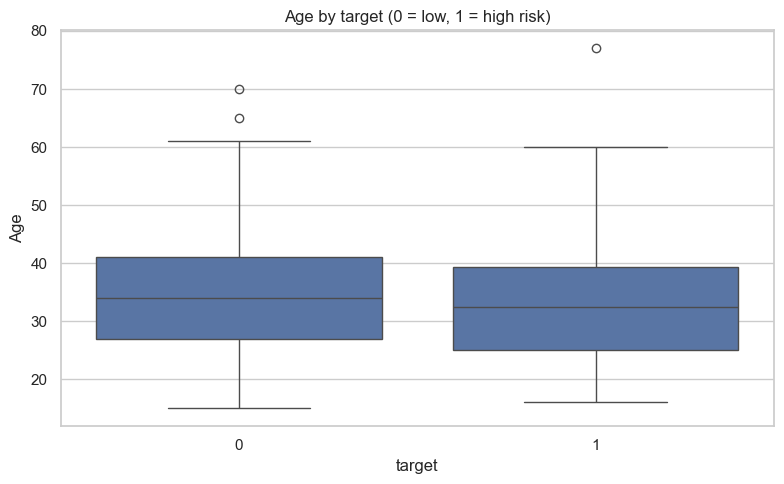

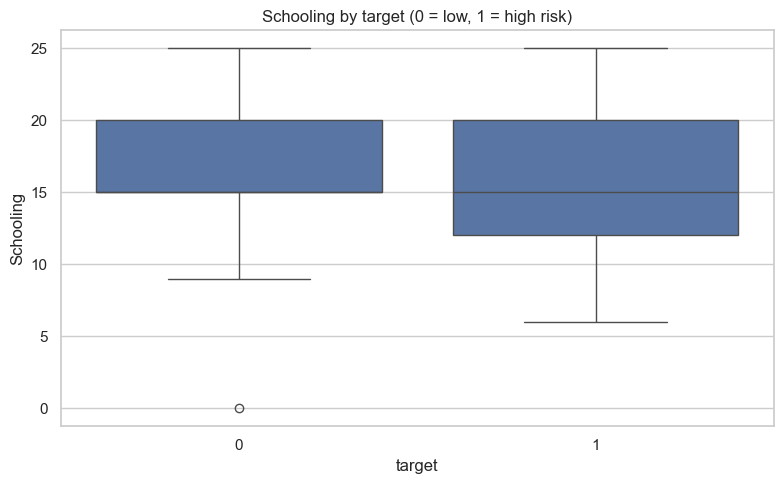

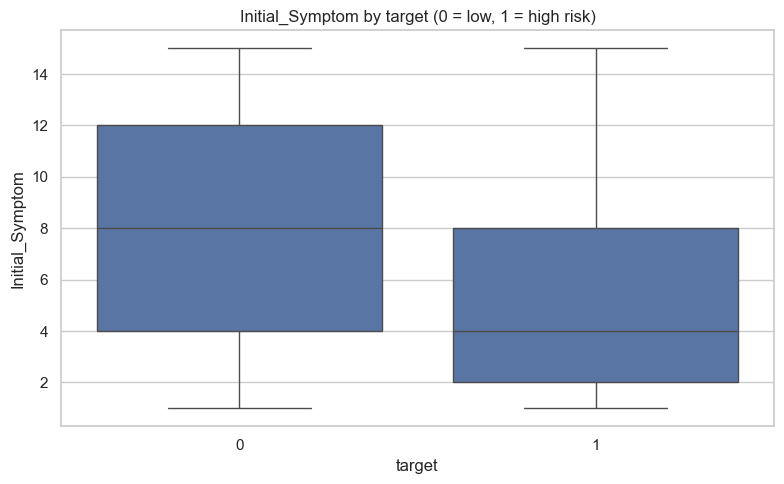

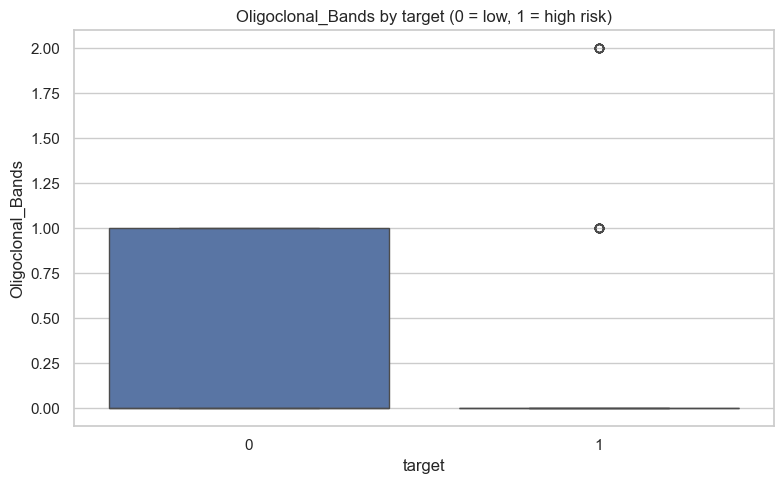

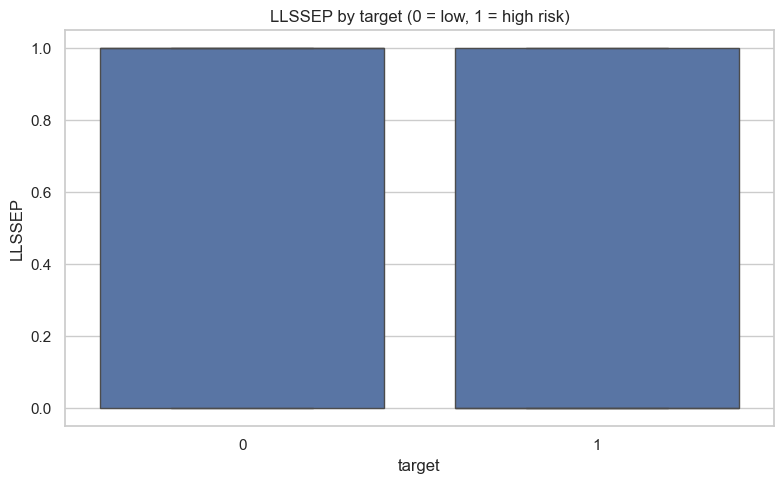

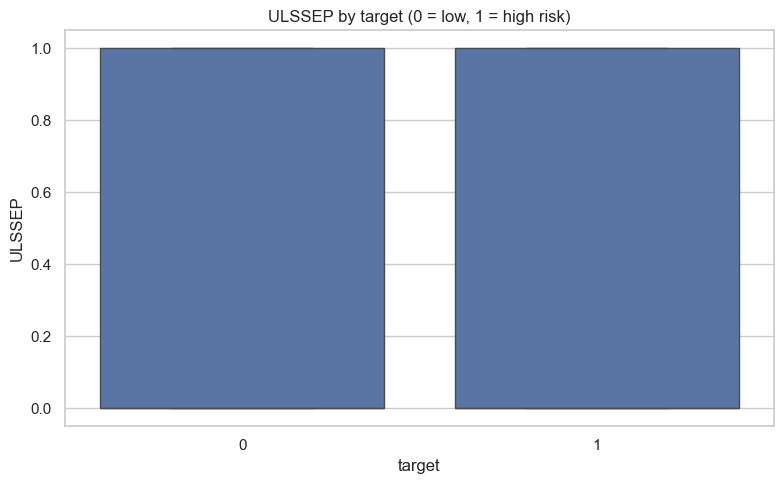

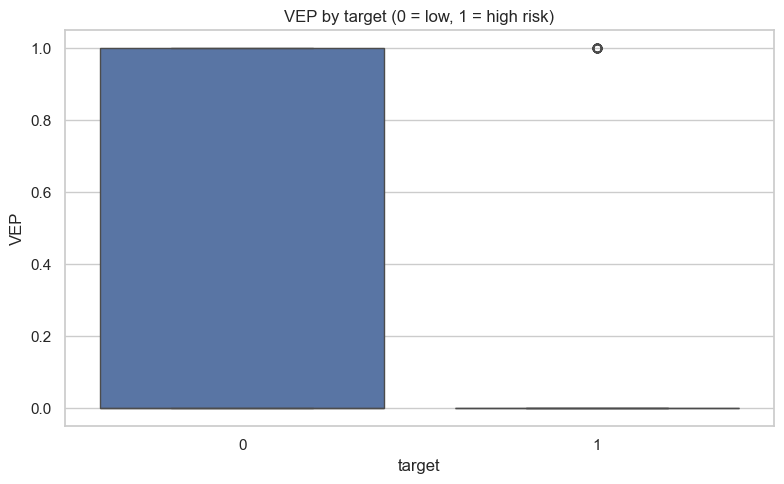

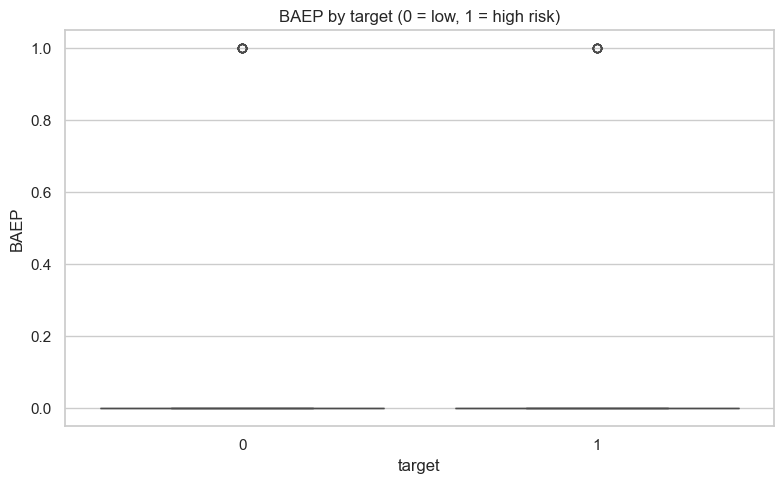

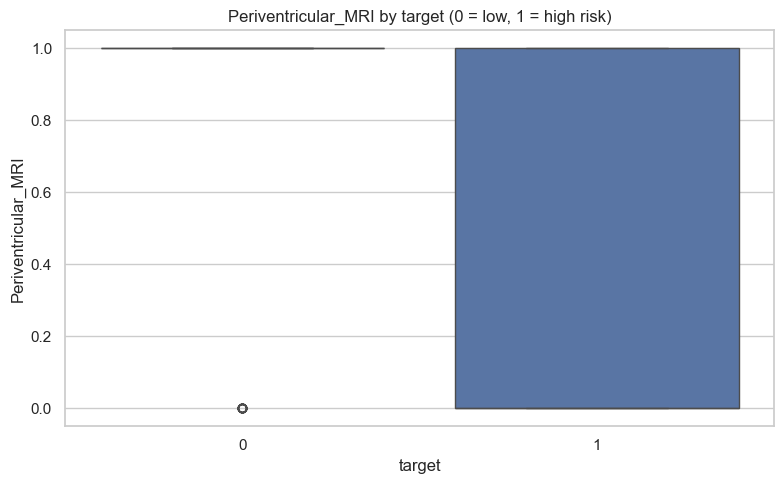

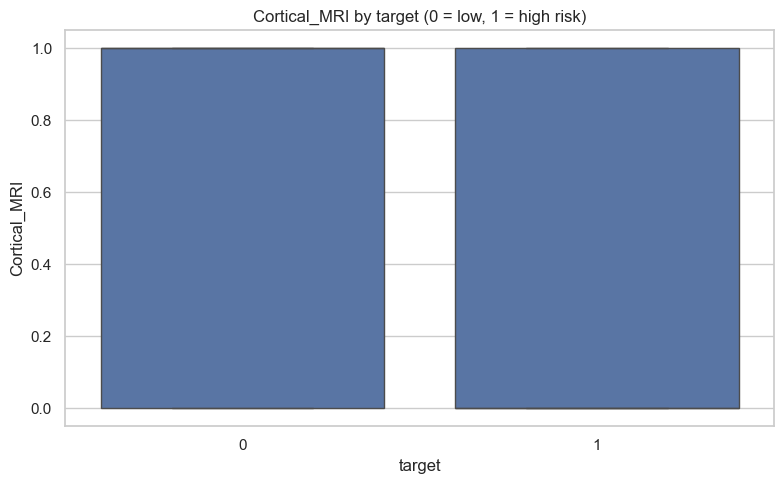

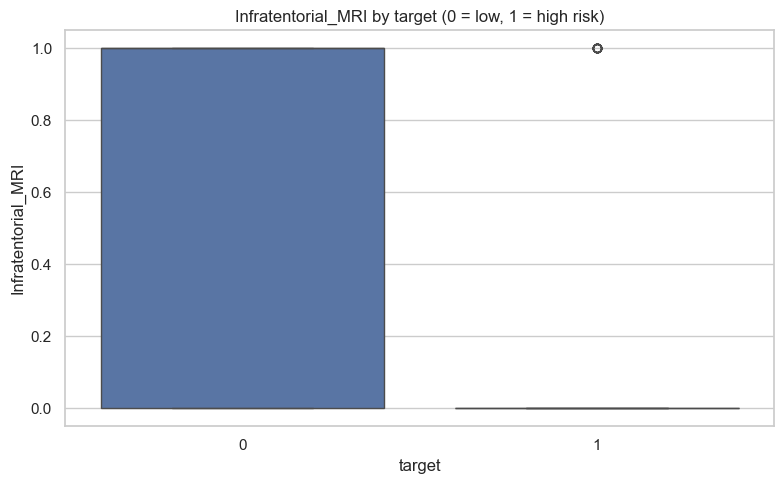

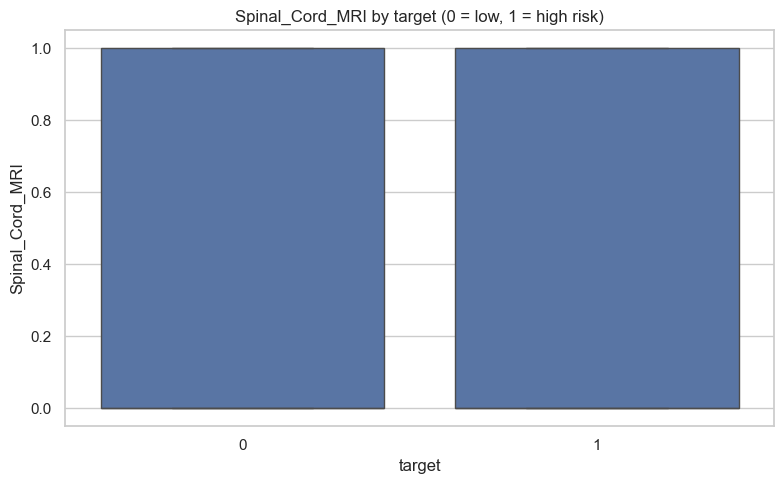

In [20]:
for col in numeric_cols:
    plt.figure()
    sns.boxplot(data=df, x="target", y=col)
    plt.title(f"{col} by target (0 = low, 1 = high risk)")
    plt.tight_layout()
    plt.show()


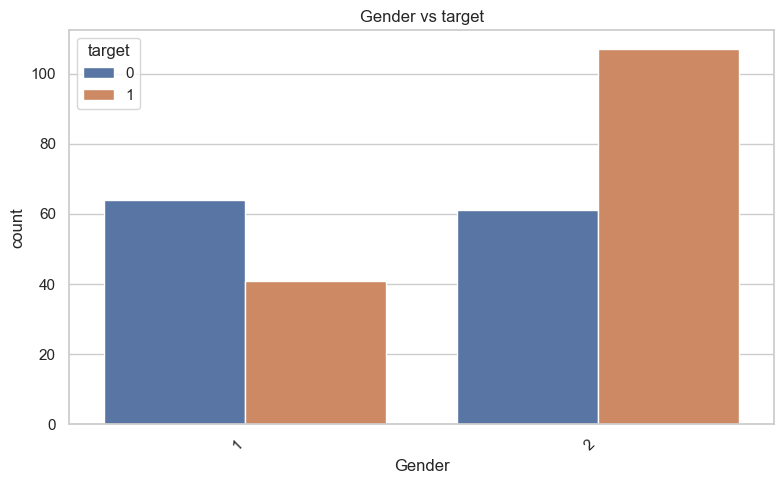

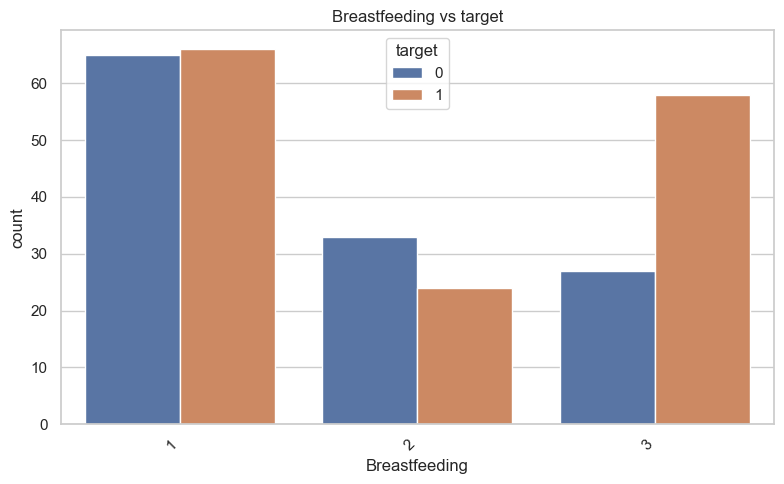

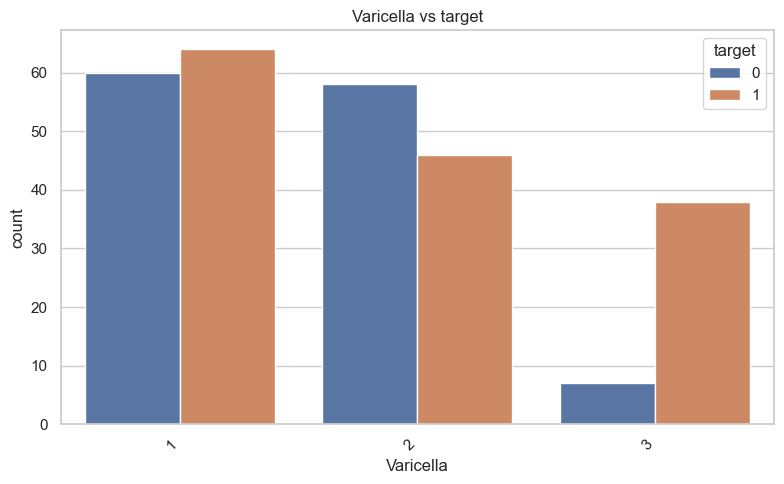

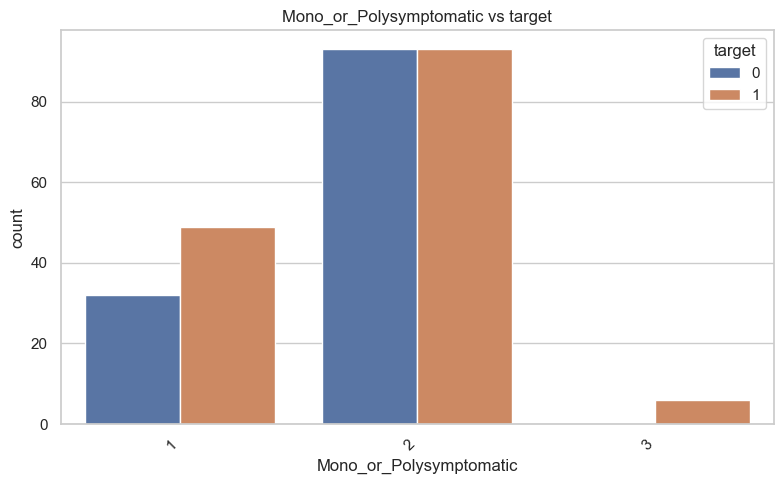

In [22]:
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue="target")
    plt.title(f"{col} vs target")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


In [23]:
for col in categorical_cols:
    rate = (
        df.groupby(col)["target"]
        .mean()
        .sort_values(ascending=False)
    )
    print(f"\nHigh risk rate by {col}:")
    print(rate)



High risk rate by Gender:
Gender
2    0.636905
1    0.390476
Name: target, dtype: float64

High risk rate by Breastfeeding:
Breastfeeding
3    0.682353
1    0.503817
2    0.421053
Name: target, dtype: float64

High risk rate by Varicella:
Varicella
3    0.844444
1    0.516129
2    0.442308
Name: target, dtype: float64

High risk rate by Mono_or_Polysymptomatic:
Mono_or_Polysymptomatic
3    1.000000
1    0.604938
2    0.500000
Name: target, dtype: float64


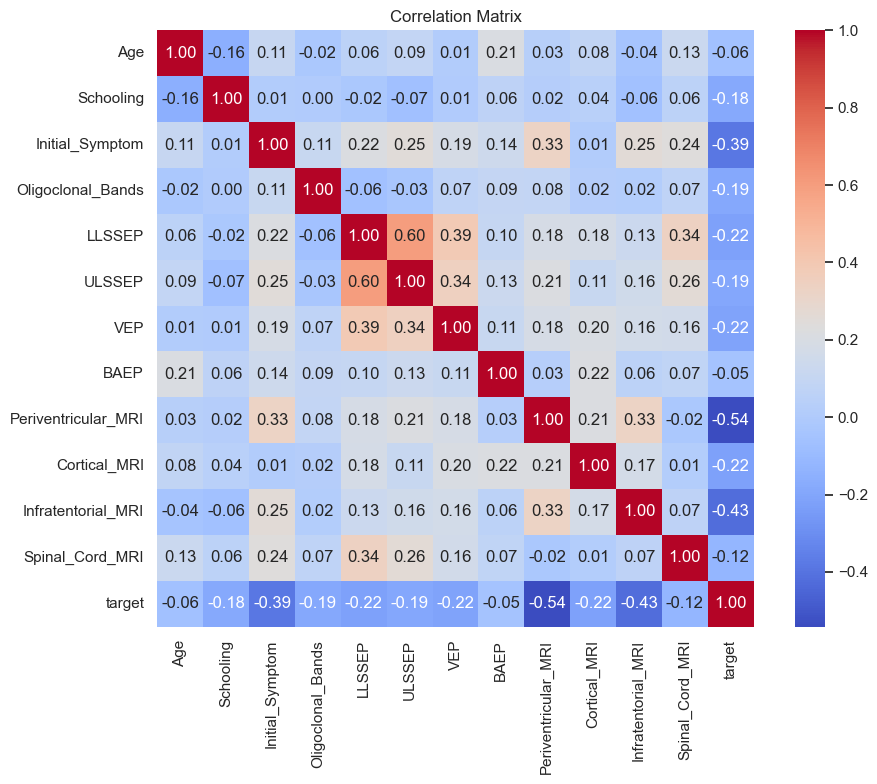

In [27]:
corr = df[numeric_cols + ["target"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [30]:
group_summary = df.groupby("target")[numeric_cols].agg(["mean"])
group_summary


,Age,Schooling,Initial_Symptom,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
target,,,,,,,,,,,,
0,34.840000,16.024000,8.208000,0.472000,0.544000,0.472000,0.416000,0.080000,0.800000,0.552000,0.504000,0.376000
1,33.405405,14.455782,4.918367,0.263514,0.324324,0.283784,0.216216,0.054054,0.256757,0.331081,0.114865,0.263514


In [32]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


In [33]:
numeric_cols = [
    "Age", "Schooling",
    "Initial_Symptom", "Oligoclonal_Bands",
    "LLSSEP", "ULSSEP", "VEP", "BAEP",
    "Periventricular_MRI", "Cortical_MRI",
    "Infratentorial_MRI", "Spinal_Cord_MRI"
]

categorical_cols = [
    "Gender", "Breastfeeding", "Varicella", "Mono_or_Polysymptomatic"
]

# EDSS'leri modelden çıkarıyoruz
drop_cols = ["Initial_EDSS", "Final_EDSS"]
df = df.drop(columns=drop_cols, errors="ignore")

feature_cols = numeric_cols + categorical_cols
X = df[feature_cols]
y = df["target"]

X.head()


,Age,Schooling,Initial_Symptom,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Gender,Breastfeeding,Varicella,Mono_or_Polysymptomatic
0,34,20.0,2.0,0,1,1,0,0,0,1,0,1,1,1,1,1
1,61,25.0,10.0,1,1,0,1,0,0,0,0,1,1,3,2,2
2,22,20.0,3.0,1,0,0,0,0,0,1,0,0,1,3,1,1
3,41,15.0,7.0,1,0,1,1,0,1,1,0,0,2,1,1,2
4,34,20.0,6.0,0,1,0,0,0,1,0,0,0,2,2,1,2


In [34]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42, stratify=y)
X_train.shape, X_test.shape


((204, 16), (69, 16))

In [36]:
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler())])

categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_cols),("cat", categorical_transformer, categorical_cols)])


In [38]:
logreg_clf = Pipeline(steps=[("preprocess", preprocessor),("model", LogisticRegression(max_iter=2000))])

logreg_clf.fit(X_train, y_train)

y_pred_lr = logreg_clf.predict(X_test)
y_proba_lr = logreg_clf.predict_proba(X_test)[:,1]

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.782608695652174
ROC-AUC: 0.8902027027027027
              precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.82      0.76      0.79        37

    accuracy                           0.78        69
   macro avg       0.78      0.78      0.78        69
weighted avg       0.79      0.78      0.78        69



In [39]:
rf_clf = Pipeline(steps=[("preprocess", preprocessor),("model", RandomForestClassifier(n_estimators=300,max_depth=None,random_state=42))])

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:,1]

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.7681159420289855
ROC-AUC: 0.8923141891891893
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        32
           1       0.84      0.70      0.76        37

    accuracy                           0.77        69
   macro avg       0.77      0.77      0.77        69
weighted avg       0.78      0.77      0.77        69



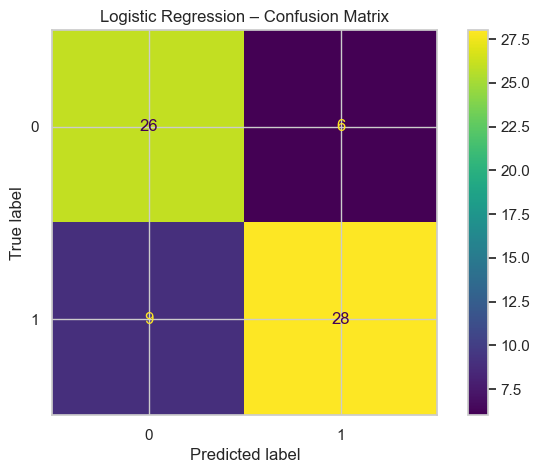

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title("Logistic Regression – Confusion Matrix")
plt.show()


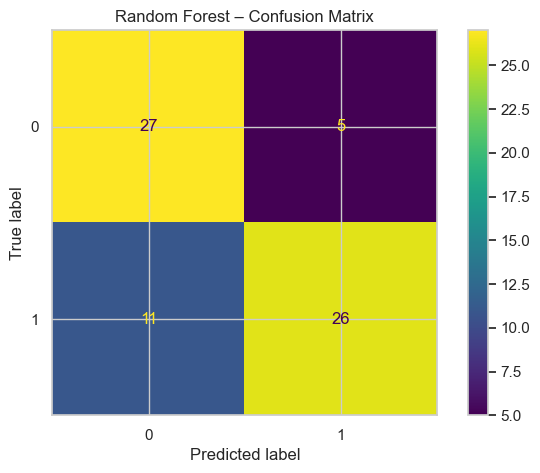

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Random Forest – Confusion Matrix")
plt.show()


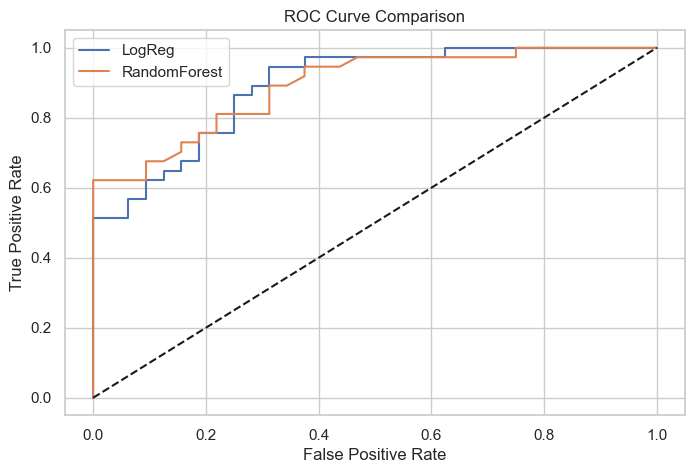

In [42]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.plot(fpr_lr, tpr_lr, label="LogReg")
plt.plot(fpr_rf, tpr_rf, label="RandomForest")
plt.plot([0,1],[0,1],"k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [44]:

rf_model = rf_clf.named_steps["model"]

ohe = rf_clf.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
cat_names = ohe.get_feature_names_out(categorical_cols)

feature_names = np.concatenate([numeric_cols, cat_names])
importances = rf_model.feature_importances_

fi = pd.DataFrame({"feature": feature_names, "importance": importances})
fi = fi.sort_values("importance", ascending=False)

fi.head(15)


,feature,importance
8,Periventricular_MRI,0.170332
2,Initial_Symptom,0.138895
10,Infratentorial_MRI,0.090708
0,Age,0.088400
1,Schooling,0.077640
3,Oligoclonal_Bands,0.061162
19,Varicella_3,0.031727
16,Breastfeeding_3,0.031249
4,LLSSEP,0.031223
6,VEP,0.031031


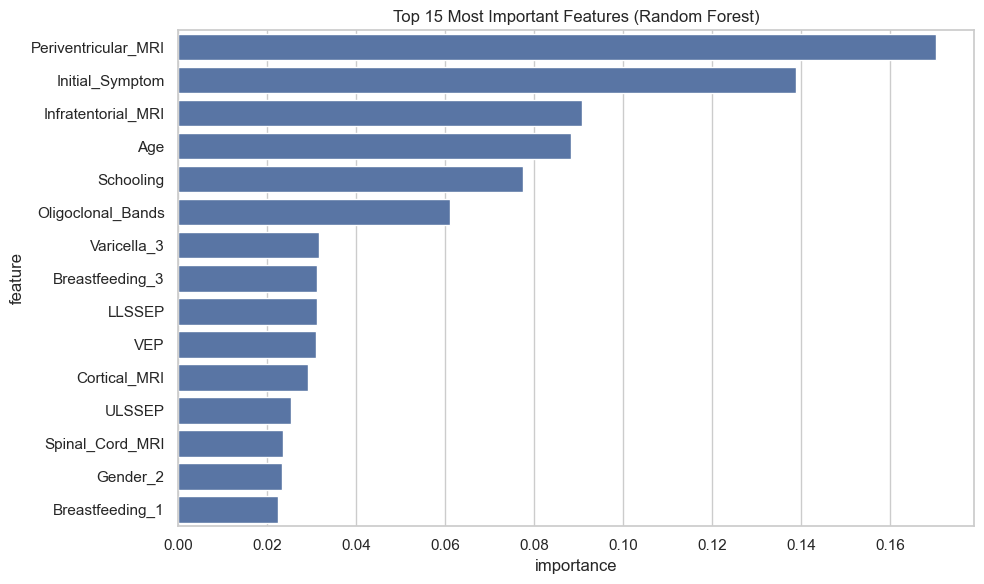

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(data=fi.head(15), x="importance", y="feature")
plt.title("Top 15 Most Important Features (Random Forest)")
plt.tight_layout()
plt.show()
